In [1]:
import gym
import torch
import pandas as pd
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2"   

from elegantrl.run import *
from neo_finrl.ccxt.data_fetch_ccxt import ccxt_fetch_data
from neo_finrl.ccxt.preprocess_ccxt import preprocess_btc

from neo_finrl.ccxt.env_btc_ccxt import BitcoinEnv
from elegantrl.agent import *

In [2]:
# url = 'C:/Users/yosou/Documents/BooksWithCode/Binance/Deep Learning/LSTM_stock_price_predictor-master/btc_create.csv'
# categorical and regression feature
url = 'C:/Users/yosou/Documents/BooksWithCode/Binance/Feature-Selection-for-Machine-Learning-master/Data/merge_augmento_btc.csv'
# url = 'C:/Users/yosou/Documents/BooksWithCode/Binance/Deep Learning/LSTM_stock_price_predictor-master/code/Data/FUTURES/DOGEUSDT/DOGEUSDT-1m-data.csv'

In [4]:
# url = 'C:/Users/yosou/Documents/BooksWithCode/Binance/Deep Learning/LSTM_stock_price_predictor-master/doge_temp.csv'
# df = pd.read_csv(url, parse_dates=True).fillna(value=0)
# df =  df.drop(['Unnamed: 0'], axis=1)

df = pd.read_csv(url, parse_dates=True).fillna(value=0)
df = df[['time', 'open', 'high', 'low', 'close', 'twitter_investing_trading', 'twitter_scam_fraud',
        'bitcointalk_shilling', 'bitcointalk_bots',
       'bitcointalk_tax', 'reddit_leverage', 'reddit_bottom',
       'reddit_strategy', 'r', 'reddit_selling',
       'reddit_institutional_money', 'reddit_prediction', 'reddit_adoption',
       'reddit_portfolio', 'reddit_investing_trading',
       'reddit_euphoric_excited', 'reddit_risk', 'reddit_bullish',
       'reddit_bots', 'reddit_due_diligence', 'reddit_dip',
       'reddit_advice_support', 'reddit_good_news', 'reddit_learning',
       'reddit_marketcap', 'reddit_positive', 'reddit_tax',
       'reddit_long_term_investing', 'reddit_competition', 'reddit_buying',
       'reddit_price', 'reddit_optimistic', 'reddit_negative']]

In [5]:
# '''data_fetch'''
# df = ccxt_fetch_data(start = '20200602 00:00:00', end = '20210609 00:00:00',
#                     pair = 'DOGE/USDT', period = '1m')
# df = ccxt_fetch_data(start = '20200903 05:00:00', end = '20210503 01:00:00',
#                     pair = 'BTC/USDT', period = '1h')

In [6]:
# df = df[362360:]
df

,time,open,high,low,close,twitter_investing_trading,twitter_scam_fraud,bitcointalk_shilling,bitcointalk_bots,bitcointalk_tax,...,reddit_learning,reddit_marketcap,reddit_positive,reddit_tax,reddit_long_term_investing,reddit_competition,reddit_buying,reddit_price,reddit_optimistic,reddit_negative
0,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,4.0,1.0,0.0,0.0,1.0,...,3.0,1.0,13.0,0.0,1.0,9.0,9.0,17.0,7.0,31.0
1,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,13.0,1.0,0.0,0.0,2.0,...,5.0,1.0,17.0,0.0,2.0,12.0,13.0,24.0,7.0,35.0
2,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,10.0,1.0,0.0,0.0,0.0,...,1.0,3.0,15.0,0.0,4.0,15.0,10.0,24.0,9.0,36.0
3,2017-08-17 09:00:00,4360.00,4445.78,4360.00,4444.00,11.0,2.0,0.0,1.0,0.0,...,2.0,2.0,27.0,0.0,11.0,9.0,6.0,39.0,9.0,37.0
4,2017-08-17 10:00:00,4441.10,4470.00,4399.81,4460.00,7.0,0.0,0.0,0.0,0.0,...,1.0,0.0,16.0,0.0,6.0,7.0,8.0,32.0,5.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32051,2021-04-20 12:00:00,56266.83,56290.31,55604.73,55801.14,30.0,1.0,0.0,1.0,1.0,...,9.0,5.0,62.0,3.0,29.0,38.0,30.0,77.0,26.0,100.0
32052,2021-04-20 13:00:00,55801.13,56320.55,55693.69,56317.99,33.0,3.0,0.0,0.0,0.0,...,16.0,5.0,67.0,5.0,23.0,32.0,21.0,81.0,22.0,93.0
32053,2021-04-20 14:00:00,56318.00,56455.93,55200.00,55336.14,56.0,2.0,1.0,0.0,0.0,...,12.0,10.0,73.0,5.0,12.0,45.0,30.0,99.0,29.0,113.0
32054,2021-04-20 15:00:00,55336.14,55567.87,54649.58,55323.19,63.0,1.0,0.0,0.0,0.0,...,14.0,7.0,62.0,6.0,25.0,49.0,26.0,105.0,27.0,121.0


In [7]:
dff = df.set_index('time')
data_ary = preprocess_btc(dff)

                        open     high      low    close  \
time                                                      
2017-08-17 06:00:00  4330.29  4345.45  4309.37  4324.35   
2017-08-17 07:00:00  4316.62  4349.99  4287.41  4349.99   
2017-08-17 08:00:00  4333.32  4377.85  4333.32  4360.69   
2017-08-17 09:00:00  4360.00  4445.78  4360.00  4444.00   
2017-08-17 10:00:00  4441.10  4470.00  4399.81  4460.00   

                     twitter_investing_trading  twitter_scam_fraud  \
time                                                                 
2017-08-17 06:00:00                        4.0                 1.0   
2017-08-17 07:00:00                       13.0                 1.0   
2017-08-17 08:00:00                       10.0                 1.0   
2017-08-17 09:00:00                       11.0                 2.0   
2017-08-17 10:00:00                        7.0                 0.0   

                     bitcointalk_shilling  bitcointalk_bots  bitcointalk_tax  \
time           

In [8]:
# data_ary = preprocess_btc(df)

In [9]:
data_ary.shape

(32056, 37)

In [10]:
gpu_id = 1
args = Arguments(agent=None, env=None, gpu_id=gpu_id)
args.agent = AgentD3QN()

In [11]:
'''choose environment'''
args.env = BitcoinEnv(processed_ary = data_ary, if_train=True, if_test=False)
args.env_eval = BitcoinEnv(processed_ary = data_ary, if_train=False, if_test=False)
args.net_dim = 2 ** 9 # change a default hyper-parameters
args.batch_size = 2 ** 8

In [ ]:
train_and_evaluate(args)

| GPU id: 1, cwd: ./AgentD3QN/BitcoinEnv_1
| Remove history
ID      Step      MaxR |    avgR      stdR       objA      objC |  avgS  stdS
1   1.02e+03      0.20 |
1   1.02e+03      0.20 |    0.20      0.00       0.08      0.00 |  4808     0
1   2.05e+03      0.87 |
1   2.05e+03      0.87 |    0.87      0.00       0.13      0.00 |  4808     0
1   3.07e+03      0.87 |    0.18      0.00       0.14      0.00 |  4808     0
1   5.12e+03      0.87 |    0.12      0.00       0.13      0.00 |  4808     0
1   7.17e+03      3.19 |
1   7.17e+03      3.19 |    3.19      0.00       0.12      0.00 |  4808     0
1   8.19e+03      3.19 |    1.00      0.00       0.11      0.00 |  4808     0
1   1.02e+04      3.19 |    0.16      0.00       0.10      0.00 |  4808     0
1   1.23e+04      3.19 |    0.39      0.00       0.09      0.00 |  4808     0
1   1.43e+04      3.19 |    0.95      0.00       0.08      0.00 |  4808     0
1   1.64e+04      3.19 |    0.99      0.00       0.08      0.00 |  4808     0
1   1.8

1   2.09e+05      3.19 |   -0.35      0.00       0.00      0.00 |  4808     0
1   2.11e+05      3.19 |   -0.71      0.00       0.00      0.00 |  4808     0
1   2.13e+05      3.19 |   -0.91      0.00       0.00      0.00 |  4808     0
1   2.15e+05      3.19 |    0.03      0.00       0.00      0.00 |  4808     0
1   2.17e+05      3.19 |    0.62      0.00       0.00      0.00 |  4808     0
1   2.19e+05      3.19 |   -0.53      0.00       0.00      0.00 |  4808     0
1   2.21e+05      3.19 |    0.40      0.00       0.00      0.00 |  4808     0
1   2.23e+05      3.19 |    0.45      0.00       0.00      0.00 |  4808     0
1   2.25e+05      3.19 |    0.72      0.00       0.00      0.00 |  4808     0
1   2.27e+05      3.19 |   -0.06      0.00       0.00      0.00 |  4808     0
1   2.29e+05      3.19 |    0.25      0.00       0.00      0.00 |  4808     0
1   2.31e+05      3.19 |    0.65      0.00       0.00      0.00 |  4808     0
1   2.33e+05      3.19 |    0.51      0.00       0.00      0.00 

1   4.26e+05      3.19 |    0.93      0.00       0.00      0.00 |  4808     0
1   4.28e+05      3.19 |   -0.51      0.00       0.00      0.00 |  4808     0
1   4.30e+05      3.19 |   -0.54      0.00       0.00      0.00 |  4808     0
1   4.32e+05      3.19 |   -0.59      0.00       0.00      0.00 |  4808     0
1   4.34e+05      3.19 |   -0.15      0.00       0.00      0.00 |  4808     0
1   4.36e+05      3.19 |   -0.22      0.00       0.00      0.00 |  4808     0
1   4.38e+05      3.19 |   -1.41      0.00       0.00      0.00 |  4808     0
1   4.40e+05      3.19 |    0.09      0.00       0.00      0.00 |  4808     0
1   4.42e+05      3.19 |   -0.97      0.00       0.00      0.00 |  4808     0
1   4.44e+05      3.19 |    0.16      0.00       0.00      0.00 |  4808     0
1   4.46e+05      3.19 |   -1.97      0.00       0.00      0.00 |  4808     0
1   4.49e+05      3.19 |   -1.90      0.00       0.00      0.00 |  4808     0
1   4.51e+05      3.19 |   -0.02      0.00       0.00      0.00 

1   6.43e+05      3.19 |    0.78      0.00       0.00      0.00 |  4808     0
1   6.45e+05      3.19 |   -0.45      0.00       0.00      0.00 |  4808     0
1   6.47e+05      3.19 |    0.17      0.00       0.00      0.00 |  4808     0
1   6.49e+05      3.19 |   -0.80      0.00       0.00      0.00 |  4808     0
1   6.51e+05      3.19 |   -0.41      0.00       0.00      0.00 |  4808     0
1   6.53e+05      3.19 |   -0.57      0.00       0.00      0.00 |  4808     0
1   6.55e+05      3.19 |    0.02      0.00       0.00      0.00 |  4808     0
1   6.57e+05      3.19 |    0.25      0.00       0.00      0.00 |  4808     0
1   6.59e+05      3.19 |   -0.24      0.00       0.00      0.00 |  4808     0
1   6.62e+05      3.19 |    0.17      0.00       0.00      0.00 |  4808     0
1   6.64e+05      3.19 |    0.28      0.00       0.00      0.00 |  4808     0
1   6.66e+05      3.19 |   -0.42      0.00       0.00      0.00 |  4808     0
1   6.68e+05      3.19 |    0.32      0.00       0.00      0.00 

In [ ]:
args = Arguments(agent=None, env=None, gpu_id=gpu_id)
args.agent = AgentD3QN()
args.env = BitcoinEnv(processed_ary = data_ary, if_train=False, if_test=True)
args.net_dim = 2 ** 9 # change a default hyper-parameters
args.batch_size = 2 ** 8
args.if_remove = False
args.cwd = './AgentD3QN/BitcoinEnv_'+gpu_id
args.init_before_training()

In [ ]:
prediction = args.env.trade_prediction(args, torch, df)

In [ ]:
args.env.backtest_plot(prediction, df)

FileNotFound when load_model: None
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (3

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1.....

State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2..... (39,)
State 1..... (39,)
State 2.....

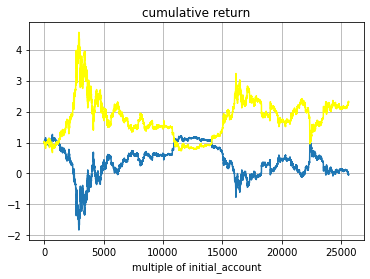

FileNotFoundError: [Errno 2] No such file or directory: 'None/cumulative_return.jpg'

<Figure size 432x288 with 0 Axes>

In [12]:
# Draw the graph
import matplotlib.pyplot as plt
%matplotlib inline

BitcoinEnv(processed_ary = data_ary, if_train=False, if_test=True)\
.draw_cumulative_return(self = args.env, args = args, _torch = torch)